In [1]:
from google.colab import drive
drive.mount('/gdrive')
root='/gdrive/MyDrive/'

Mounted at /gdrive


**Importing libraries**

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN,Dropout
from keras.callbacks import History


import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM


import time #helper libraries
from sklearn.preprocessing import MinMaxScaler

from numpy import newaxis

import time

# For time stamps
from datetime import datetime

In [4]:
pd.set_option('display.max_columns',None)  #to show all columns
data = pd.read_csv('/content/drive/MyDrive/INFY.csv',  parse_dates=True, index_col='Date', squeeze=True) #reading dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5787 entries, 2000-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5787 non-null   float64
 1   High       5787 non-null   float64
 2   Low        5787 non-null   float64
 3   Close      5787 non-null   float64
 4   Adj Close  5787 non-null   float64
 5   Volume     5787 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 316.5 KB


In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.890625,5.906250,5.462891,5.767578,3.913799,5331200
2000-01-04,5.641113,6.281250,5.570313,5.812500,3.944282,5056000
2000-01-05,5.476563,5.855469,5.328125,5.765625,3.912475,6054400
2000-01-06,5.598633,5.703125,5.156250,5.156250,3.498962,4704000
2000-01-07,4.945313,5.515625,4.703125,5.515625,3.742828,7884800


In [7]:
data.rename(columns={'Close/Last': 'Close'}, inplace=True)
data2 = data.copy()
INFY=data.copy()

In [8]:
INFY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5.787000e+03
mean,7.477093,7.559846,7.392994,7.477786,6.304148,1.165400e+07
std,4.893667,4.924424,4.864108,4.895696,5.025273,9.102631e+06
min,1.015938,1.070938,0.956250,1.031875,0.701403,3.360000e+05
25%,4.466875,4.530625,4.405625,4.470625,3.154488,6.126400e+06
50%,6.706250,6.765000,6.637500,6.700000,5.121497,9.566400e+06
75%,8.783750,8.866250,8.680000,8.775000,7.239282,1.456960e+07
max,26.150000,26.389999,25.580000,26.200001,25.631620,1.475912e+08


In [9]:
INFY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.890625,5.906250,5.462891,5.767578,3.913799,5331200
2000-01-04,5.641113,6.281250,5.570313,5.812500,3.944282,5056000
2000-01-05,5.476563,5.855469,5.328125,5.765625,3.912475,6054400
2000-01-06,5.598633,5.703125,5.156250,5.156250,3.498962,4704000
2000-01-07,4.945313,5.515625,4.703125,5.515625,3.742828,7884800


In [17]:
from pandas_profiling import ProfileReport

<ipython-input-17-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [18]:
profile = ProfileReport(INFY, title='Pandas Profiling Report', explorative=True)

In [19]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**visualizing stock prices history**

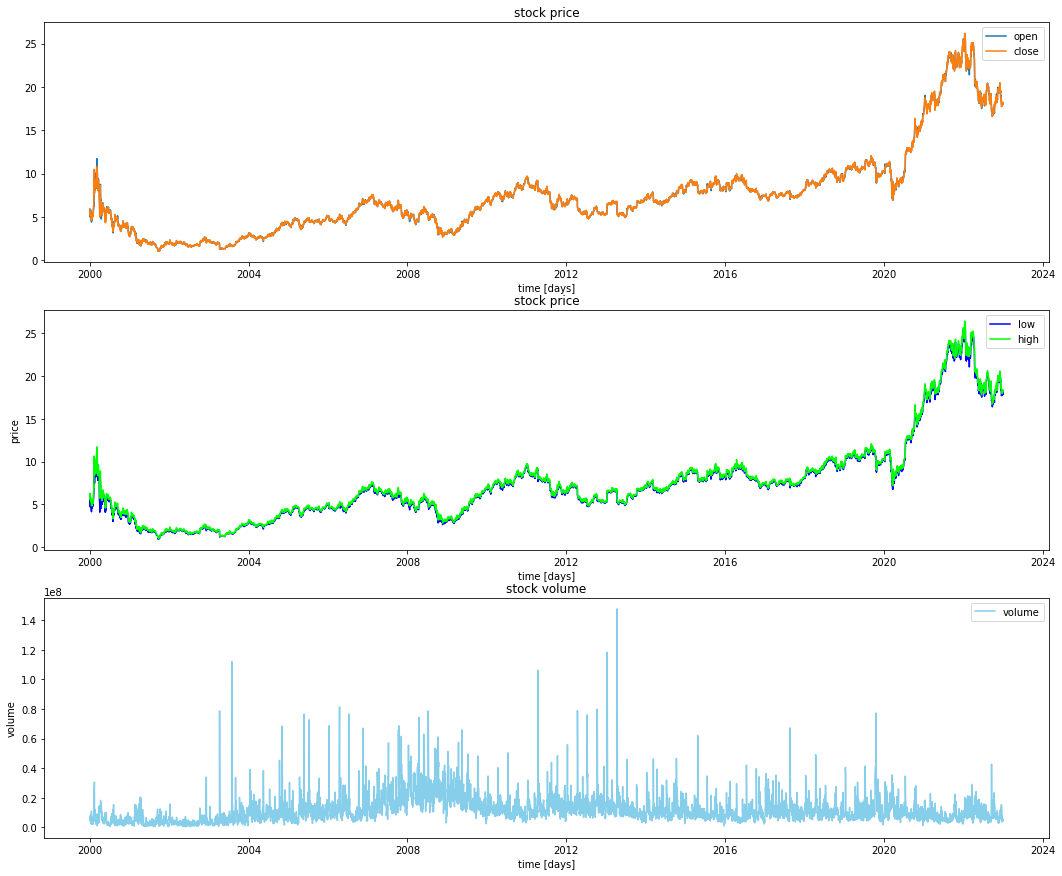

In [20]:
plt.figure(figsize=(18,15));
plt.subplot(3,1,1)
plt.plot(INFY['Open'], label='open')
plt.plot(INFY['Close'], label='close')
#plt.gca().invert_xaxis()
plt.title('stock price')
plt.xlabel('time [days]')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(INFY['Low'], color='blue', label='low')
plt.plot(INFY['High'], color='lime', label='high')
#plt.gca().invert_xaxis()
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(3,1,3)
plt.plot(INFY['Volume'], color='skyblue', label='volume')
#plt.gca().invert_xaxis()
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [22]:
n1Row, n1Col = INFY.shape
print(f'There are {n1Row} rows and {n1Col} columns in apple Historical Quotes dataset')

There are 5787 rows and 6 columns in apple Historical Quotes dataset


In [23]:
INFY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5787 entries, 2000-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5787 non-null   float64
 1   High       5787 non-null   float64
 2   Low        5787 non-null   float64
 3   Close      5787 non-null   float64
 4   Adj Close  5787 non-null   float64
 5   Volume     5787 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 316.5 KB


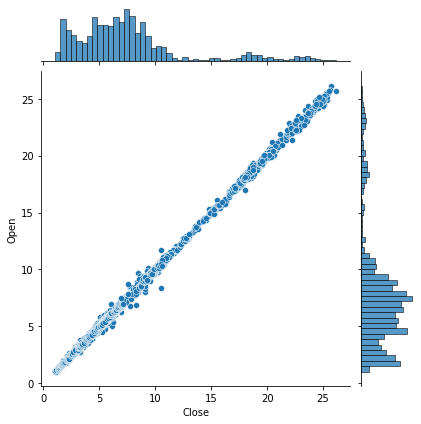

In [27]:
import seaborn as sns
sns.jointplot(x=INFY['Close'], y=INFY['Open'])

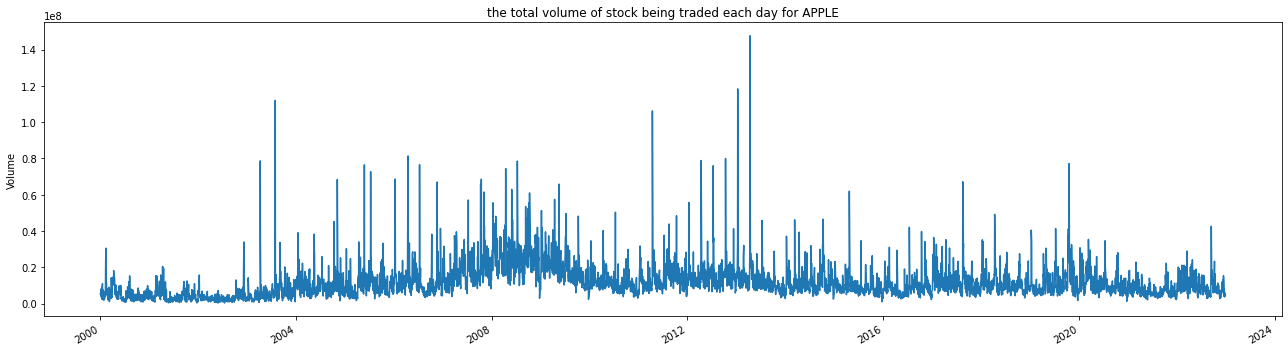

In [28]:
plt.figure(figsize=(18,5))
INFY['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
#plt.gca().invert_xaxis()
plt.title(f"the total volume of stock being traded each day for APPLE")
plt.rcParams["figure.figsize"] = (14,5)

plt.tight_layout()

**FITTING APPLE DATASET TO MODEL**


1) To build a LSTM model,we need to seperate our stock data into a training set and a test set.

2) A special data structure is needed to cover 60-time stamps, based on which RNN will predict the 61st price. Here the number of past timestamps is set to 60 based on experimentation. Thus, x_train is a nested list, which contains lists of 60 time-stamp prices

3) Normalization is a very important part for any Recurrent Neural Network. For our LSTM model, normalization will play an important role. Normalization using MinMaxScaler will bring our entire datapoints between a minimum and a maximum value. For this purpose, we will use the values (0,1).

4)now we choose a specific stock feature: Close ,normalize stock data ,then create train, validation and test data sets


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

**preparing training set**:


extract close values from stock data and convert it to a number series and calculate the size for 90% of dataset.(math ceil used to ensure the size is integer):

In [31]:
close_prices= data.filter(['Close']) #creates a dataframe just with specified column( close )
values = close_prices.values
training_data_len = math.ceil(len(values) * 0.9)

normalizing data and set apart 90% of data as the training set:

In [32]:
scaled_data=scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len,:]

we set a window_size = 60 .then create a 60-day window of historical values(i- 60) as our feature data (x_train), and the following 60-day window as label data (y_train)

In [33]:
window_size = 60
x_train=[]
y_train=[]
for i in range(window_size,len(train_data)):
  x_train.append(train_data[i-window_size:i,0])
  y_train.append(train_data[i,0])

In [34]:
x_train,y_train=np.array(x_train),np.array(y_train)

Reshape data:

1) we only have one indicator or feature (Close price). But we can add more indicators following the same data processing methods.


2) newshape is in (batch size, number of timestamps, number of indicators). (batch size, number of timestamps) is the shape of x_train. Here we only have 1 indicator.

In [35]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

**preparing test set:**

extract 'Close' values from normalized dataset(the last 10% of dataset). similar to training set, we will have to create feature data(x_test) and label data (y_test) from our test set:

In [36]:
test_data = scaled_data[training_data_len - window_size: , :]
x_test=[]
y_test= values[training_data_len:]
for j in range(window_size,len(test_data)):
  x_test.append(test_data[j-window_size:j,0])

x_test=np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [37]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (5149, 60, 1)
y_train.shape =  (5149,)
x_test.shape =  (578, 60, 1)
y_test.shape =  (578, 1)


**BI-LSTM MODEL**

Build the bidirectional lstm model

In [64]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='tanh'), input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.build((x_train.shape[1],1)) 
model.add(Dense(1))

In [65]:
start = time.time()
model.compile(loss='mse',  optimizer='adam', metrics=['accuracy'])
print ('compilation time : ', time.time() - start)

compilation time :  0.014409065246582031


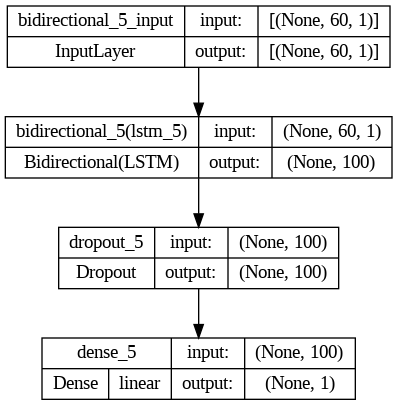

In [66]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
                          show_dtype=False, show_layer_names=True,rankdir='TB',
                          expand_nested=False, dpi=96, layer_range=None,
                          show_layer_activations=True)

In [67]:
history=model.fit(x_train, y_train, epochs=50, batch_size=32,validation_split=0.2,  verbose=1 , shuffle=True)

Epoch 1/50
129/129 [==============================] - 7s 21ms/step - loss: 0.0020 - accuracy: 2.4278e-04 - val_loss: 2.7781e-04 - val_accuracy: 0.0000e+00
Epoch 2/50
129/129 [==============================] - 1s 9ms/step - loss: 3.4060e-04 - accuracy: 2.4278e-04 - val_loss: 3.9719e-04 - val_accuracy: 0.0000e+00
Epoch 3/50
129/129 [==============================] - 1s 9ms/step - loss: 2.8872e-04 - accuracy: 2.4278e-04 - val_loss: 1.8791e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
129/129 [==============================] - 1s 9ms/step - loss: 2.6106e-04 - accuracy: 2.4278e-04 - val_loss: 2.4392e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
129/129 [==============================] - 1s 9ms/step - loss: 2.3439e-04 - accuracy: 2.4278e-04 - val_loss: 1.8183e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
129/129 [==============================] - 1s 9ms/step - loss: 2.1220e-04 - accuracy: 2.4278e-04 - val_loss: 1.9845e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
129/129 [==============================] - 1

In [68]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 1s 5ms/step


In [69]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
mse = np.mean(predictions - y_test)**2
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predictions, multioutput='variance_weighted')
print('RMSE : ',rmse)
print('MSE : ',mse)
print('R2 : ',R2)

RMSE :  0.3203056934098505
MSE :  0.10259573723076514
R2 :  0.9718584043046364


In [71]:
model.save("bi-lstm.h5")

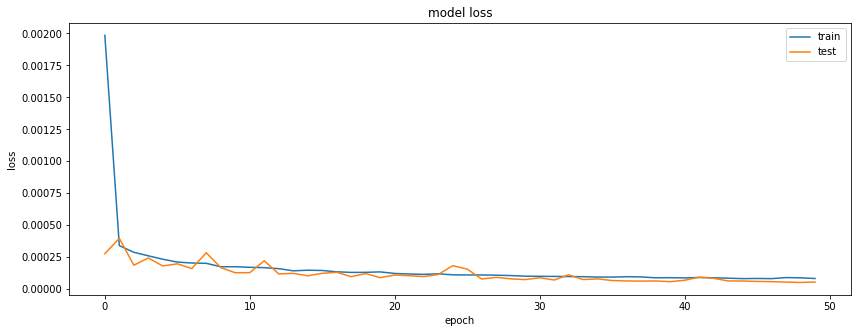

In [72]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


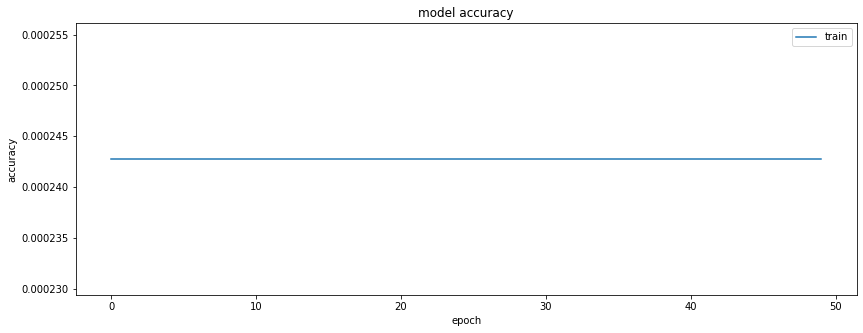

In [73]:
# Visualize training history
# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.size=(10,5)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [74]:
print('accuracy =',history.history['accuracy'][-1])

accuracy = 0.00024277737247757614


**Visualizing predicted closing prices**

<ipython-input-76-63bddebda86e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['predictions'] = predictions


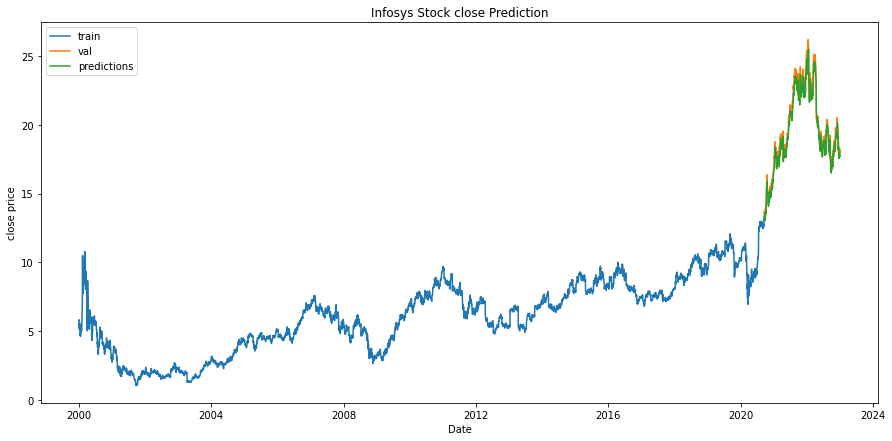

In [76]:
# Predict the stock closing price

data1 = data.filter(['Close'])
train= data1[:training_data_len]
validation = data1[training_data_len:]
validation['predictions'] = predictions

plt.figure(figsize=(15, 7))
plt.title('Infosys Stock close Prediction')
plt.xlabel('Date')
plt.ylabel('close price')
plt.plot(train)
plt.plot(validation[['Close','predictions']])
plt.legend(['train','val','predictions'],loc='upper left')
plt.show()

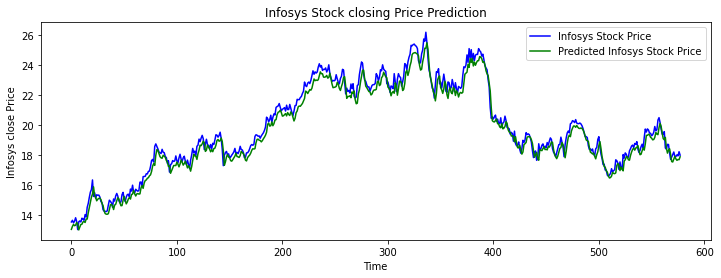

In [77]:
# Predict the stock prices

plt.figure(figsize=(12, 4))

real_stock_price = y_test[:]
plt.plot(real_stock_price, color='blue', label='Infosys Stock Price')
plt.plot(predictions, color='green', label='Predicted Infosys Stock Price')

plt.title('Infosys Stock closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Infosys close Price')
plt.legend()
plt.show()